### imports

In [1]:
%matplotlib inline
import numpy as np
from tqdm import trange
import requests
import gzip
import pickle
import torch
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt

### data loading

In [2]:
# Raw file URL for the dataset
url = "https://github.com/mnielsen/neural-networks-and-deep-learning/raw/master/data/mnist.pkl.gz"
filename = url.split("/")[-1]

# Download the dataset
response = requests.get(url)

# Save the file locally
with open(filename, "wb") as f:
    f.write(response.content)

# Open and extract the .pkl.gz file
with gzip.open(filename, 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

# The dataset is now split into training, validation, and testing sets
X_train, Y_train = train_set
X_val, Y_val = valid_set
X_test, Y_test = test_set

# Combine training and validation datasets
X_train = np.concatenate((X_train, X_val))  # Combine images
Y_train = np.concatenate((Y_train, Y_val))  # Combine labels

# Check the shapes of the datasets
print(f"Training set shape: {X_train.shape}, Labels shape: {Y_train.shape}")
print(f"Test set shape: {X_test.shape}, Labels shape: {Y_test.shape}")

Training set shape: (60000, 784), Labels shape: (60000,)
Test set shape: (10000, 784), Labels shape: (10000,)


### helper function

In [3]:
def show_image(image_no,axis=False):
    plt.figure(figsize=(2, 2))  # Set the width and height in inches
    plt.imshow(X_train[image_no].reshape(28, 28))  # Display the first training image
    plt.title(f"Label: {Y_train[image_no]}")  # Show the corresponding label
    if not axis:
        plt.axis('off')  # Hide axis
    plt.show()

### testing area

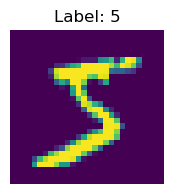

In [4]:
show_image(0)